# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
"""
Pada submisiion kali ini saya menggunakan dataset tanpa label "Shop Customer Data". Dataset ini merupakan sumber dataset yang disarankan
pada Instruksi Submission -> Lainnya. Dataset ini berisi informasi pelanggan toko sebagai berikut:
- CustomerID: ID unik untuk setiap pelanggan.
- Gender: Jenis kelamin pelanggan.
- Age: Usia pelanggan.
- Annual Income ($): Pendapatan tahunan pelanggan.
- Spending Score (1-100): Skor pengeluaran pelanggan berdasarkan perilaku belanja.
- Profession: Pekerjaan pelanggan.
- Work Experience: Pengalaman kerja pelanggan dalam tahun.
- Family Size: Ukuran keluarga pelanggan.

Dataset ini memiliki 2001 baris dan mencakup data numerik (misal: Age, Annual Income) dan kategorikal (misal: Gender, Profession).
"""

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [84]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [36]:
#Memuat Dataset
df = pd.read_csv('sample_data/Customers.csv')

# Melihat beberapa baris pertama untuk memastikan data telah dimuat dengan benar
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


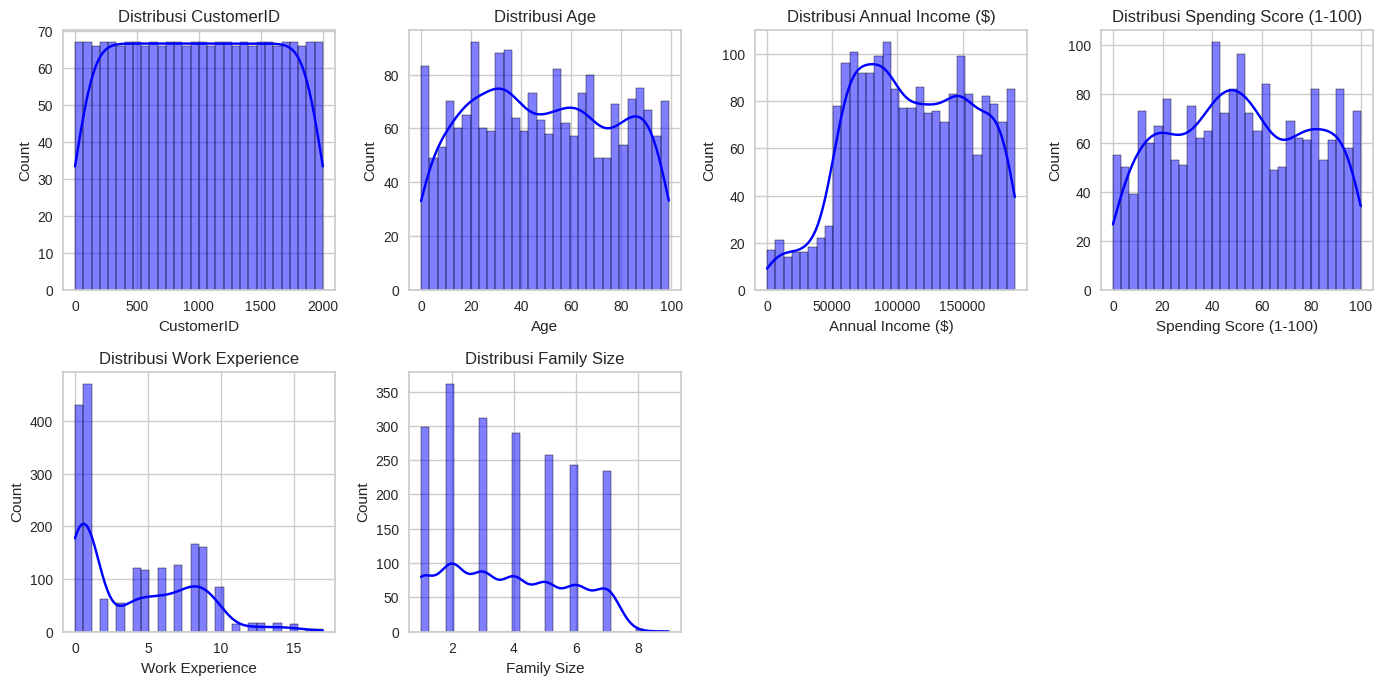

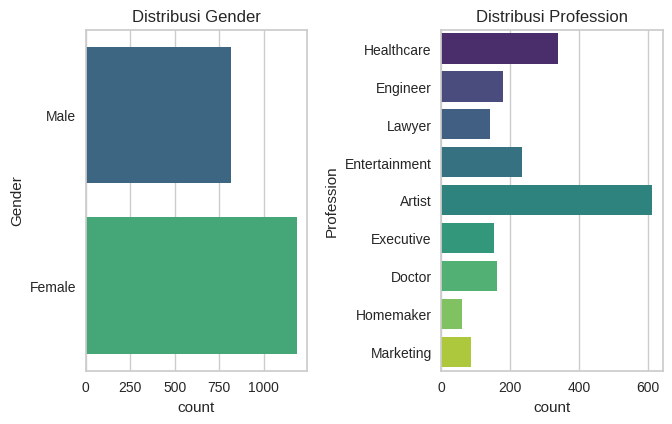

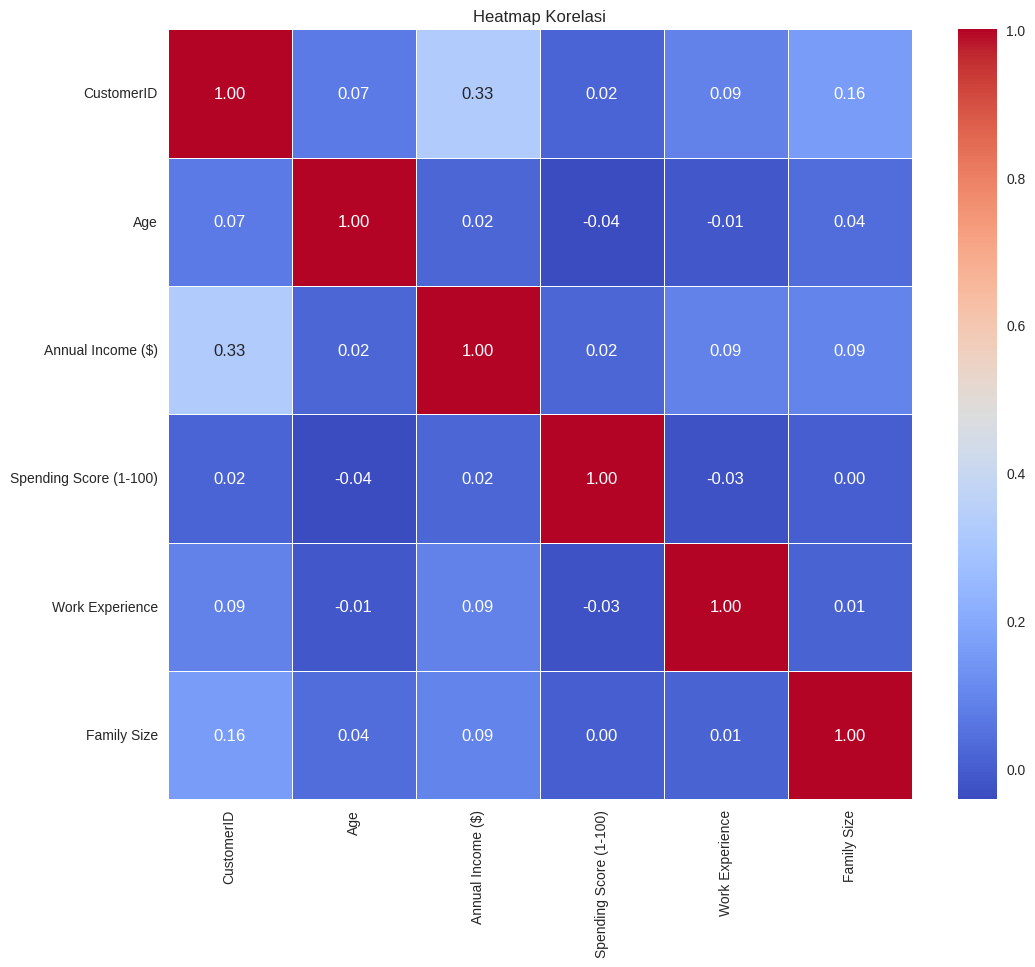

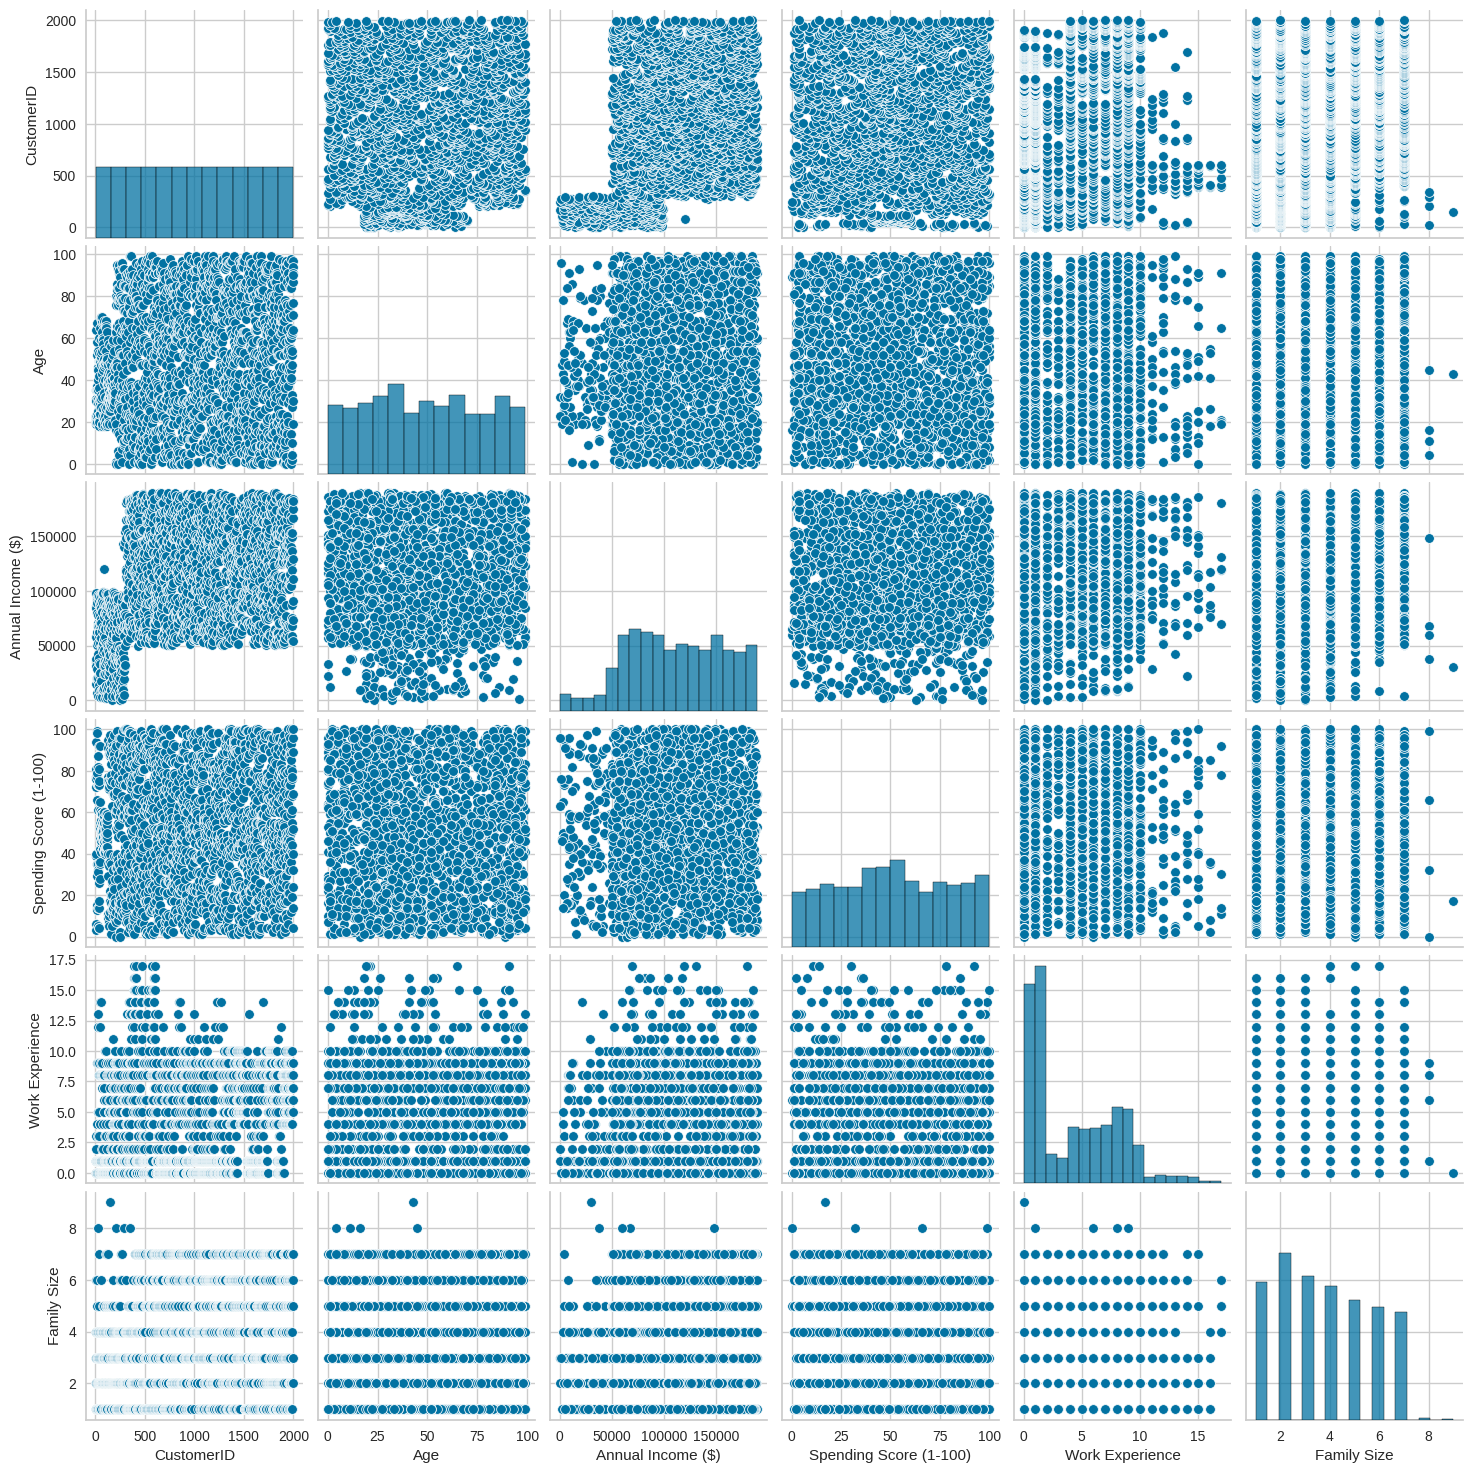

In [37]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

# Mengecek missing values jika ada
df.isnull().sum()

# Menampilkan statistik deskriptif dari dataset untuk kolo numerik
df.describe()

# Visualisasi distribusi variabel numerik
num_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features, 1):
    plt.subplot(3,4,i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    # sns.countplot(y=data[column], palette='viridis')
    sns.countplot(y=df[column], palette='viridis', hue=df[column], legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# Pairplot untuk fitur numerik
sns.pairplot(df[num_features])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Number of duplicates after removal: 0


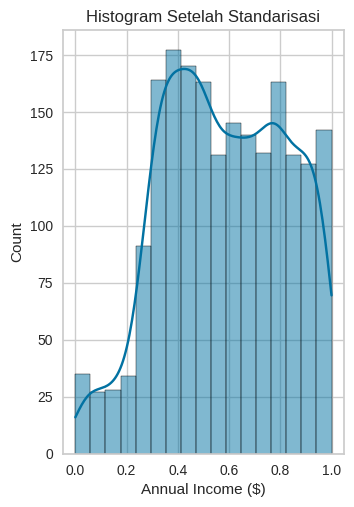

   Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0     1.0  0.191919           0.078958                    0.39    0.555556   
1     1.0  0.212121           0.184236                    0.81    0.222222   
2     0.0  0.202020           0.452694                    0.06    0.222222   
3     0.0  0.232323           0.310569                    0.77    0.777778   
4     0.0  0.313131           0.200027                    0.40    0.333333   

   Work Experience  Family Size   Cluster  
0           0.0625        0.375  0.857143  
1           0.1875        0.250  0.857143  
2           0.0625        0.000  0.285714  
3           0.0000        0.125  0.285714  
4           0.1250        0.625  0.285714  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2000 non-null   float64
 1

In [100]:
"""
Missing Values
"""
# Mengisi missing values pada kolom 'Profession' dengan modus (nilai yang paling sering muncul)
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Cek Kembali
# df.isnull().sum()

"""
Data duplikat
"""
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

# Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
print(f"Number of duplicates after removal: {df.duplicated().sum()}")

"""
Standarisasi Fitur Numerik
"""
# Histogram sebelum standarisasi
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.histplot(df['Annual Income ($)'], kde=True)
# plt.title("Histogram Sebelum Standarisasi")
# plt.show()

# Normalisasi atau Standarisasi Fitur
num_features = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Histogram setelah standarisasi
plt.subplot(1,2,2)
sns.histplot(df['Annual Income ($)'], kde=True)
plt.title("Histogram Setelah Standarisasi")
plt.show()

"""
Outliners
"""
# Deteksi dan Penanganan Outlier (using IQR method)
for features in num_features:
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df[features] = np.where(df[features] < lower_bound, lower_bound, df[features])
    df[features] = np.where(df[features] > upper_bound, upper_bound, df[features])

"""
Encoding data kategorikal
"""
# Encoding Data Kategorikal
cat_features = df.select_dtypes(include='object').columns
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Menghapus kolom CustomerID, tidak diperlukan untuk analisis
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

print(df.head())
print(df.info())

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

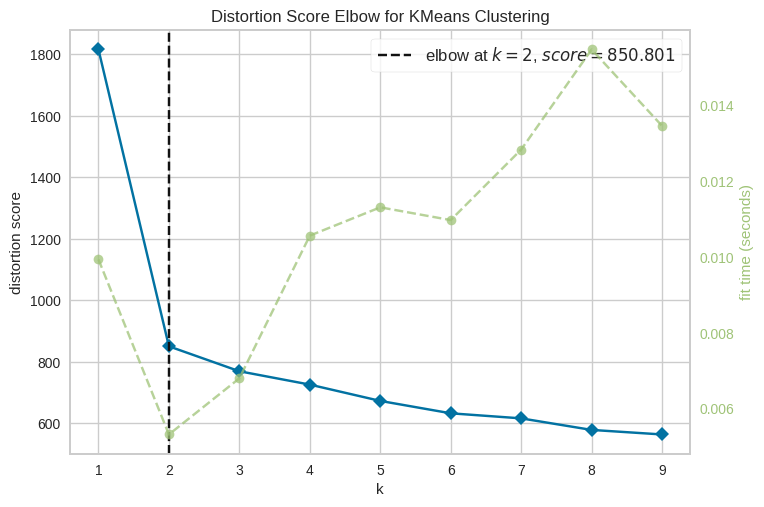

   Gender       Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0     1.0  0.191919           0.078958                    0.39    0.555556   
1     1.0  0.212121           0.184236                    0.81    0.222222   
2     0.0  0.202020           0.452694                    0.06    0.222222   
3     0.0  0.232323           0.310569                    0.77    0.777778   
4     0.0  0.313131           0.200027                    0.40    0.333333   

   Work Experience  Family Size  Cluster  
0           0.0625        0.375        0  
1           0.1875        0.250        0  
2           0.0625        0.000        1  
3           0.0000        0.125        2  
4           0.1250        0.625        1  


In [105]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer Kelbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1,10))

# Fit visualizer dgn data untuk menemukan jumlah cluster optimal
visualizer.fit(df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

# Inisialisasi dan melatih model Kmearns dengan jumlah cluster = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menambahkan hasil cluster ke dataframe
df['Cluster'] = labels

# Menampilkan hasil model clustering
print(df.head())

# Mendapatkan jumlah cluster
k = 2

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah Cluster: 2, Silhouette Score: 0.48
Jumlah Cluster: 3, Silhouette Score: 0.44
Jumlah Cluster: 4, Silhouette Score: 0.31
Jumlah Cluster: 5, Silhouette Score: 0.21
Jumlah Cluster: 6, Silhouette Score: 0.15
Jumlah Cluster: 7, Silhouette Score: 0.15
Jumlah Cluster: 8, Silhouette Score: 0.15
Jumlah Cluster: 9, Silhouette Score: 0.14
Jumlah Cluster: 10, Silhouette Score: 0.14


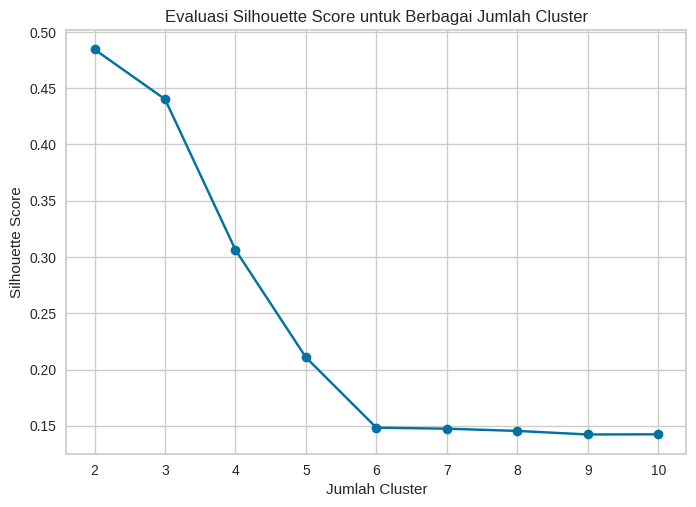

Jumlah Cluster Optimal berdasarkan Silhouette Score: 2


In [106]:
# Menghitung Silhouette Score untuk berbagai jumlah cluster
sil_scores = []
k_range = range(2, 11)  # Coba jumlah cluster dari 2 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_

    # Menghitung Silhouette Score untuk cluster tersebut
    sil_score = silhouette_score(df, labels)
    sil_scores.append(sil_score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {sil_score:.2f}")

# Visualisasi Silhouette Scores untuk jumlah cluster yang berbeda
plt.plot(k_range, sil_scores, marker='o')
plt.title('Evaluasi Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Memilih jumlah cluster dengan Silhouette Score tertinggi
optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f"Jumlah Cluster Optimal berdasarkan Silhouette Score: {optimal_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [107]:
# Update num_features to exclude 'CustomerID'
num_features = df.select_dtypes(include=np.number).columns.drop('CustomerID', errors='ignore')  # Handle potential KeyError

# Feature Selection - Variance Threshold
# Menggunakan VarianceThreshold untuk memilih fitur yang memiliki variansi lebih tinggi dari threshold tertentu
# Misalnya, kita hanya akan mempertahankan fitur yang memiliki variansi lebih tinggi dari 0.1
selector = VarianceThreshold(threshold=0.1)
df_selected_variance = df[df.columns[selector.fit(df).get_support()]]

# Feature Selection - PCA (Principal Component Analysis)
# Mengurangi dimensi data dengan PCA, misalnya kita memilih 3 komponen utama
pca = PCA(n_components=3)
df_selected_pca = pca.fit_transform(df[num_features])

# Melatih Model Clustering Sebelum Feature Selection
kmeans_before = KMeans(n_clusters=3, random_state=0)
kmeans_before.fit(df[num_features])
labels_before = kmeans_before.labels_

# Menghitung Silhouette Score sebelum feature selection
sil_score_before = silhouette_score(df[num_features], labels_before)
print(f"Silhouette Score sebelum Feature Selection: {sil_score_before:.2f}")

# Melatih Model Clustering Setelah Variance Threshold Feature Selection
kmeans_variance = KMeans(n_clusters=3, random_state=0)
kmeans_variance.fit(df_selected_variance)
labels_variance = kmeans_variance.labels_

# Menghitung Silhouette Score setelah Variance Threshold Feature Selection
sil_score_variance = silhouette_score(df_selected_variance, labels_variance)
print(f"Silhouette Score setelah Variance Threshold Feature Selection: {sil_score_variance:.2f}")

# 6. Melatih Model Clustering Setelah PCA Feature Selection
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(df_selected_pca)
labels_pca = kmeans_pca.labels_

# Menghitung Silhouette Score setelah PCA Feature Selection
sil_score_pca = silhouette_score(df_selected_pca, labels_pca)
print(f"Silhouette Score setelah PCA Feature Selection: {sil_score_pca:.2f}")

Silhouette Score sebelum Feature Selection: 0.44
Silhouette Score setelah Variance Threshold Feature Selection: 1.00
Silhouette Score setelah PCA Feature Selection: 0.67


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

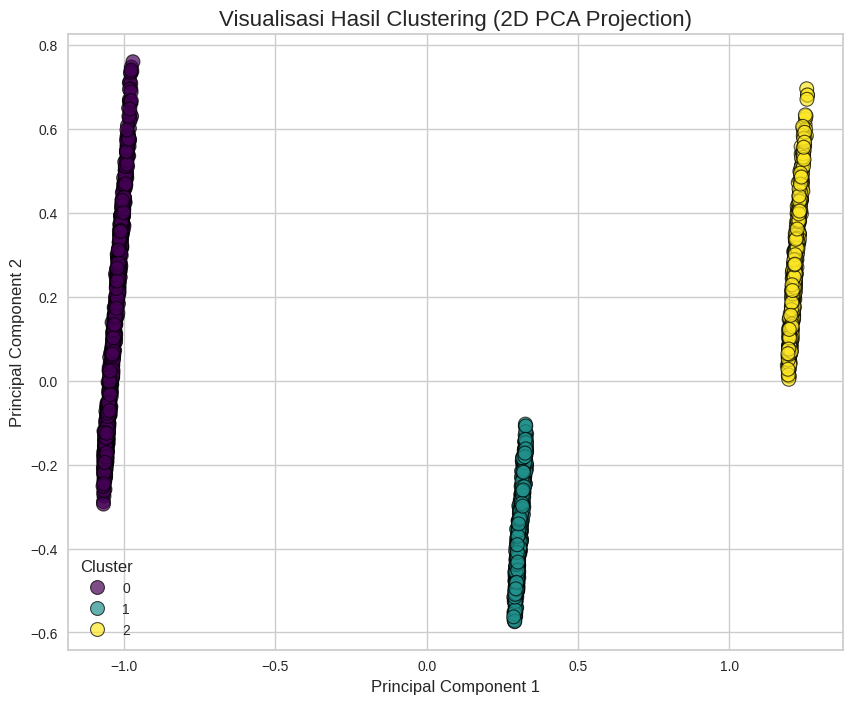

In [110]:
# Visualisasi Hasil Clustering
# Menggunakan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[num_features])  # Menggunakan fitur numerik yang sudah distandarisasi

# Menambahkan hasil PCA ke dalam dataframe untuk visualisasi
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']  # Menambahkan label cluster ke data PCA

# Plotting hasil clustering dalam 2D menggunakan scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='black', alpha=0.7)
plt.title('Visualisasi Hasil Clustering (2D PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Jumlah data pada setiap cluster:
Cluster
0    814
1    663
2    523
Name: count, dtype: int64

Deskripsi statistik tiap cluster:

Cluster 0:
       Gender         Age  Annual Income ($)  Spending Score (1-100)  \
count   814.0  814.000000         814.000000              814.000000   
mean      1.0    0.496563           0.584245                0.509447   
std       0.0    0.289756           0.239801                0.278086   
min       1.0    0.000000           0.000000                0.010000   
25%       1.0    0.242424           0.404865                0.280000   
50%       1.0    0.484848           0.568788                0.510000   
75%       1.0    0.747475           0.787141                0.750000   
max       1.0    1.000000           0.999847                1.000000   

       Profession  Work Experience  Family Size  Cluster  
count  814.000000       814.000000   814.000000    814.0  
mean     0.329648         0.262362     0.346130      0.0  
std      0.289367         0.24804

<ipython-input-111-db45ff3092ce>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True, alpha=0.4)
<ipython-input-111-db45ff3092ce>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True, alpha=0.4)
<ipython-input-111-db45ff3092ce>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True, alpha=0.4)
<ipython-input-111-db45ff3092ce>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}'

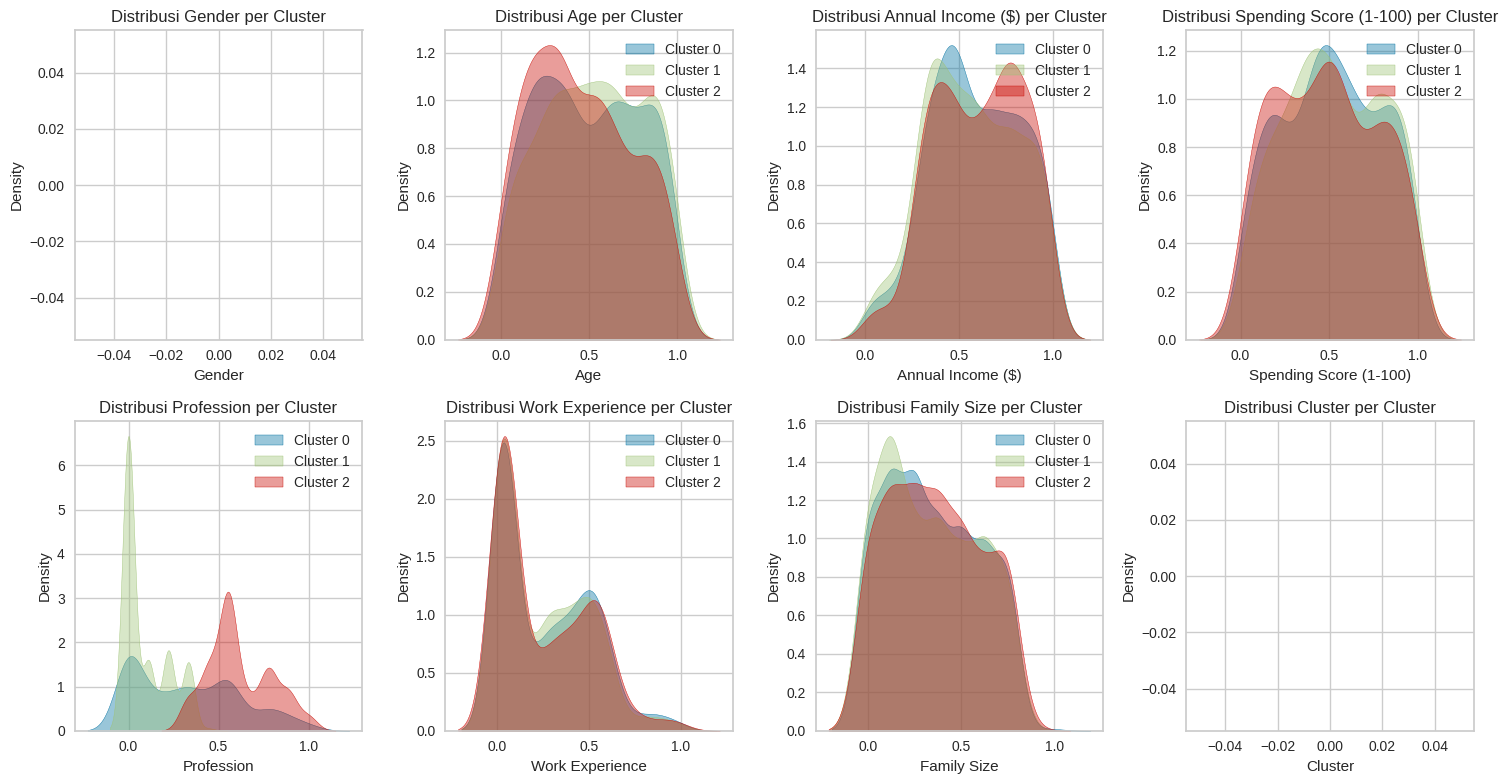

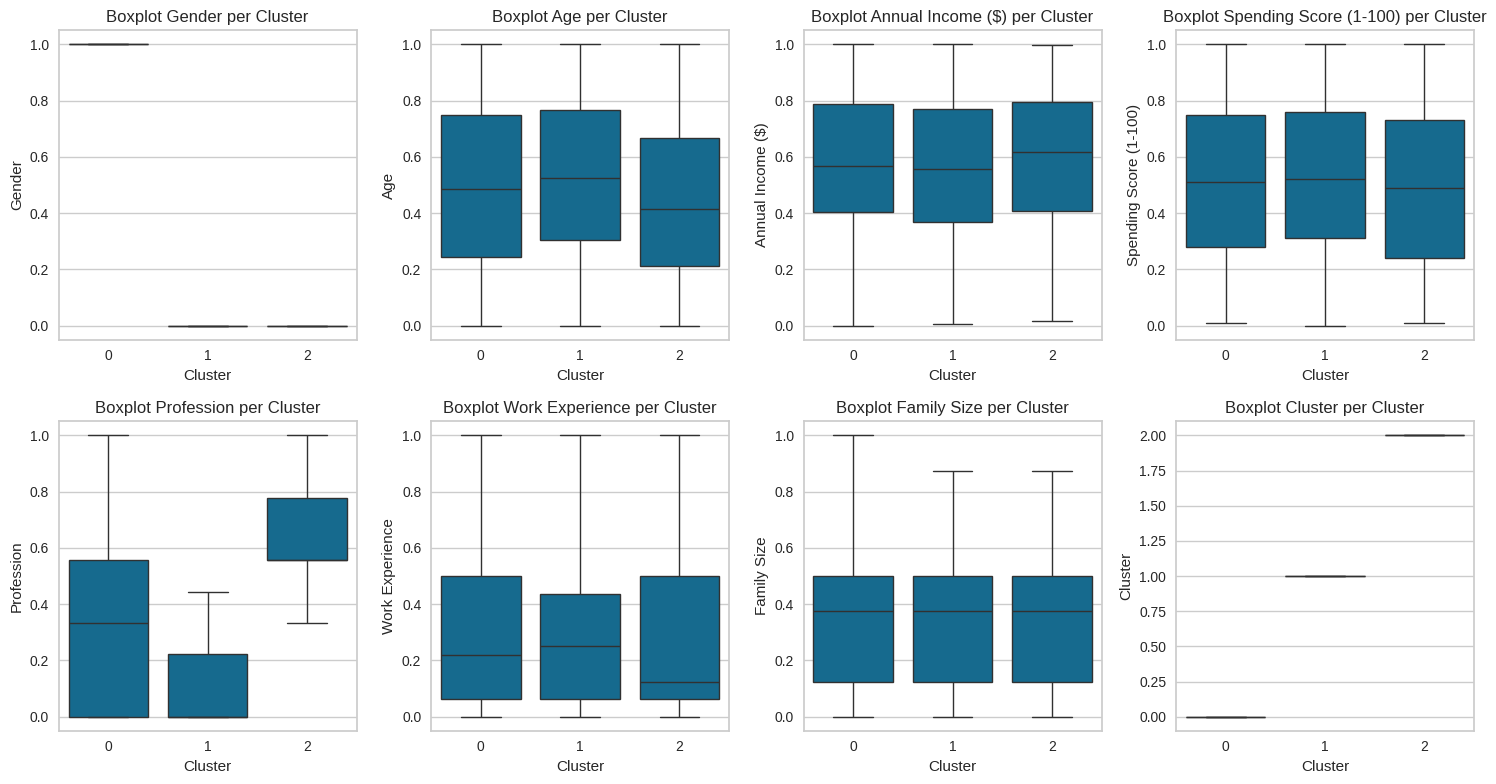

In [111]:
# Analisis Karakteristik Tiap Cluster
print("Jumlah data pada setiap cluster:")
print(df['Cluster'].value_counts())  # Menampilkan jumlah data per cluster

# Deskripsi Statistik untuk Tiap Cluster
print("\nDeskripsi statistik tiap cluster:")
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe())

# Visualisasi Distribusi Fitur Numerik untuk Tiap Cluster
num_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, len(num_features)//2, i)
    for cluster in sorted(df['Cluster'].unique()):
        sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True, alpha=0.4)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi Fitur Numerik Menggunakan Boxplot
plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, len(num_features)//2, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Boxplot {feature} per Cluster')
plt.tight_layout()
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0: "Pelanggan dengan Penghasilan Sedang dan Pengeluaran Seimbang"
- Jumlah Data: 814 pelanggan (Cluster terbesar).
- Gender: Semua pelanggan dalam cluster ini memiliki Gender = 1 (kategori gender "Laki-laki").
- Age:
Rata-rata umur adalah 0.49 (sekitar usia paruh baya jika data asli dinormalisasi).
Distribusi umur cukup merata dengan dominasi di rentang menengah.
- Annual Income ($):
Rata-rata penghasilan tahunan sekitar 0.58 (skala normalisasi).
Kelompok ini memiliki pendapatan sedang.
- Spending Score (1-100):
Rata-rata skor pengeluaran adalah 0.51, yang menunjukkan pengeluaran seimbang.
- Profession:
Mayoritas pelanggan di cluster ini memiliki profession di kisaran rendah ke menengah.
- Work Experience: Pengalaman kerja relatif rendah ke sedang.
- Family Size: Rata-rata ukuran keluarga 0.34.

Interpretasi:
Cluster ini menggambarkan pelanggan dengan pendapatan menengah dan pengeluaran yang moderat. Pelanggan ini kemungkinan memiliki stabilitas ekonomi dengan pola pengeluaran yang teratur.

2. Cluster 1: "Pelanggan Muda dengan Penghasilan dan Pengeluaran Lebih Stabil"
- Jumlah Data: 663 pelanggan.
Gender: Semua pelanggan di cluster ini memiliki Gender = 0 ("Perempuan").
- Age:
Rata-rata umur adalah 0.52 (lebih muda dari cluster 0).
- Annual Income ($):
Penghasilan tahunan rata-rata 0.56. Distribusi cukup seragam.
- Spending Score (1-100):
Rata-rata pengeluaran adalah 0.52, sedikit lebih tinggi dari Cluster 0.
- Profession:
Mayoritas pelanggan memiliki profesi dengan nilai rendah, menunjukkan pekerjaan tingkat awal atau kategori pekerjaan tertentu.
- Work Experience: Pengalaman kerja juga rendah hingga sedang.
- Family Size: Rata-rata ukuran keluarga adalah 0.33.

Interpretasi:
Cluster ini merepresentasikan pelanggan lebih muda, dengan pendapatan stabil dan pengeluaran yang terkontrol. Mereka cenderung berada di awal karir dengan ukuran keluarga kecil.

3. Cluster 2: "Pelanggan dengan Penghasilan Tinggi dan Profesi Senior"
- Jumlah Data: 523 pelanggan.
Gender: Semua pelanggan memiliki Gender = 0 ("Perempuan").
- Age:
Rata-rata umur adalah 0.45, lebih muda dibanding cluster 1 tetapi hampir seimbang.
- Annual Income ($):
Rata-rata penghasilan tahunan adalah 0.60 (lebih tinggi dibanding cluster lain).
- Spending Score (1-100):
Rata-rata skor pengeluaran adalah 0.48, sedikit lebih rendah dibanding cluster lain.
- Profession:
Mayoritas pelanggan memiliki profesi tinggi (nilai profesi mendekati 0.6-0.8).
- Work Experience: Pengalaman kerja berkisar dari sedang hingga tinggi.
- Family Size: Ukuran keluarga rata-rata 0.36.

Interpretasi:
Cluster ini menggambarkan pelanggan dengan pendapatan tinggi, profesi senior, tetapi dengan pengeluaran yang lebih konservatif. Mereka mungkin memiliki prioritas keuangan yang berbeda, seperti tabungan atau investasi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [112]:
# Mengeksport Data Hasil Clustering

# Menyimpan hasil clustering ke dalam file CSV
output_file = "hasil_clustering.csv"  # Nama file output
df.to_csv(output_file, index=False)

print(f"Data hasil clustering berhasil disimpan ke dalam file: {output_file}")


Data hasil clustering berhasil disimpan ke dalam file: hasil_clustering.csv
